# Building our Neural Network

### Introduction

In the last lesson, we saw some of the data that neural networks could interpret, and did so exploring our dataset of handwritten digits.  In this lesson, we'll work with that dataset again, this time feeding it into a neural network, and then using the neural network to identify some images. 

### Getting our Data

Once again, we'll need to download our data, which we can do so with the following line of code:

In [2]:
import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

And then let's make sure we still have our digits.

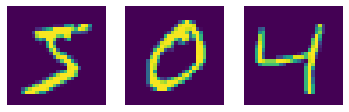

In [3]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 2))
for ax, image, label in zip(axes, X_train, y_train):
    ax.set_axis_off()
    ax.imshow(image)

And we have our corresponding labels.

In [4]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

Ok, cool so far so good.  Let's move onto building our neural network.

### Building our Neural Network

To build our neural network, we'll use the Pytorch library.  There's no way we can understand the ins and outs of a neural network just in this lesson.  Instead, let's just see it action for now.

We'll start by importing the Pytorch library, and then can build a neural network class with the following.

> Press `shift + return` on the code below.

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(0)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.W1 = nn.Linear(28*28, 64)
        self.W2 = nn.Linear(64, 64)
        self.W3 = nn.Linear(64, 64)
        self.W4 = nn.Linear(64, 10)
        
    def forward(self, X):
        A1 = w(self.W1(X))
        A2 = torch.sigmoid(self.W2(A1))
        A3 = torch.sigmoid(self.W3(A2))
        Z4 = self.W4(A3)
        return Z4

So above, we defined a *class* that creates neural networks.  A **class** is a programming concept.  If you're not familiar with term, just know that in the lines above we essentially created a factory that now can produce neural networks for us.  Want to build a neural network?  We just need to call on our factory.

In [6]:
net = Net()

Ok, so now that we created our class for building neural networks, and created a neural network, assigning it to the variable `net`, let's start training the neural network.

### Making a Prediction

Now remember that *training* our neural network means that we'll feed our neural network our input data, and the corresponding labels.  This should make sense.  When we called `net = Net()`, we just built a neural network fresh out of the factory.  So while it has the capacity to learn how to identify images -- it hasn't undergone it's training process yet.

When we train our neural network, we take our picture, have our neural network predict which digit it is, and then we check if the prediction was correct -- and update our neural network if the prediction was wrong.

So let's focus on the prediction step. To pass our data into a neural network, Pytorch first requires us to change our `X_train`, and `y_train` data from a numpy array, to a tensor.  

> Our data starts off as numpy arrays.

In [7]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

> And we convert them to the Pytorch equivalent of tensors.

In [8]:
X_train_tensor = torch.tensor(X_train).float()

y_train_tensor = torch.tensor(y_train).long().view(-1, 1)

In [9]:
type(X_train_tensor), type(y_train_tensor)

(torch.Tensor, torch.Tensor)

Ok, now that our data is converted we can select our first image.

In [10]:
first_image = X_train_tensor[0]

Now we're almost good to go, but the last step is that when we pass our data into the neural network, we need to change it from a grid, how it starts.

In [30]:
first_image[:][:5]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]])

To one long list.

In [32]:
coerced_obs = first_image.view(-1, 784)

In [33]:
coerced_obs[0][:20]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

> We'll discuss the `view` function in more detail later on.  But notice that our first observation has been changed to a list.

And now that we (1) changed our data from numpy arrays to tensors and (2) changed our first photo from a grid to a list we can simply pass it into our neural network, and out will come a prediction.

In [27]:
pred = net(coerced_obs)
pred

tensor([[-0.0677, -0.1086,  0.1979,  0.3088,  0.5144,  0.0892, -0.4978, -0.0069,
          0.1117,  0.1407]], grad_fn=<AddmmBackward>)

Ok, now we have our prediction, but how are we supposed to interpret it?

### Understanding the Prediction

Ok, now let's better understand that prediction above.  First, notice that our neural network returns a list of ten digits for a single picture.  This is because, it's predicting the likelihood that the photo matches any particular label.  We can see this even easier by passing our data through to Pytorch's softmax function:

In [28]:
F.softmax(pred, dim = 1)

tensor([[0.0846, 0.0812, 0.1103, 0.1233, 0.1514, 0.0990, 0.0550, 0.0899, 0.1012,
         0.1042]], grad_fn=<SoftmaxBackward>)

Ok, so now perhaps this can make more sense.  Each number in the list above represents the likelihood of the image being any particular digit.  So looking at the first two numbers above, our neural network predicted an $8.5%$ likelihood of the picture representing the digit $0$, and an $8.1$ percent of representing the digit $1$.  The index with the largest number is the predicted digit. 

> Here, the argmax function tells us that's 4.

In [29]:
torch.argmax(pred)

tensor(4)

So we can see that our neural network predicts that the first image is a 4.  In future lessons, we'll better understand this prediction function.  For now, let's move onto training the neural network.

### Training a Neural Network

So we just used our neural network to make a prediction.  But we have not yet trained our neural network -- that is, we haven't yet taught our neural network how to recognize digits.  Let's do that now.  Remember that our procedure for training is the following:

1. Have the neural network **predict the output**
2. **Calculate the loss** -- that is calculate how far off the prediction is from the answer (indicated by the label).
3. **Update the neural** network to ideally improve it's predictions

Ok, to calculate the loss and then update the neural network -- we'll need two more tools: our loss function, and our optimizer, which updates the neural network.  We create them below.   

In [31]:
import torch.optim as optim

x_loss = nn.CrossEntropyLoss()

adam = optim.Adam(net.parameters(), lr=0.0005)

And now it's time to go through our three steps for training the neural network.

##### 1. Predict the output

In [36]:
pred = net(coerced_obs)
pred

tensor([[-0.0677, -0.1086,  0.1979,  0.3088,  0.5144,  0.0892, -0.4978, -0.0069,
          0.1117,  0.1407]], grad_fn=<AddmmBackward>)

##### 2. Calculate the loss (by comparing the prediction with the label)

In [34]:
first_label = y_train_tensor[0]
first_label

tensor([5])

In [35]:
loss = x_loss(pred, first_label)
loss

tensor(2.3131, grad_fn=<NllLossBackward>)

##### 3. Update the neural network

To update the neural network, we call two functions.  The backward function calculates *how* to update the neural network, and the step function actually makes the updates.

In [37]:
loss.backward()
adam.step()

Ok, so that's how we train our neural network on a single image.  Now we just need to loop through each of our images following the training steps that we just saw: 

1. Have our neural network make a prediction, 
2. Calculate how far off the prediction is
3. Determine how to update the neural network and 
4. Make the update

### Putting it all together

Ok, so it's time to train on all of our images.  

Doing this will take some time (about 10 minutes) -- but it will take a lot longer, if we do not first switch to having colab use the GPU (which is faster than the CPU it's currently using).  To make the switch, you'll first need to go to the menu bar and click on `runtime` and then click on `change runtime type`.

> <img src="./change_runtime_type.png" width="30%">

From there, change the runtime type to GPU.

> <img src="./to_gpu.png" width="40%">

Ok, now let's go through the steps of creating a neural network, and then training it.  We create our neural network with the following:

In [38]:
net = Net()

And then call the `cuda` function so that this runs on the GPU.

In [ ]:
net.cuda()

Then we also need the training data and labels to run on the GPU, so we call cuda on them as well.

In [40]:
X_train_tensor_gpu = X_train_tensor.cuda()

y_train_tensor_gpu = y_train_tensor.cuda()

Then let's reinitializer our loss function, and the optimizer.

In [41]:
import torch.optim as optim

x_loss = nn.CrossEntropyLoss()
adam = optim.Adam(net.parameters(), lr=0.0005)

And finally, let's loop through the data.

In [106]:
for epoch in range(3):
    for (x, y) in zip(x_train_tensor_gpu, y_train_tensor_gpu):
        net.zero_grad()  
        X_reshaped = x.view(-1,28*28) # change image from grid to a list
        prediction = net(X_reshaped) # make prediction
        loss = x_loss(prediction, y) # calculate loss
        loss.backward() # determine how to update the neural network
        adam.step() # make the update
    print(loss)

tensor(1.0554, grad_fn=<NllLossBackward>)
tensor(0.1444, grad_fn=<NllLossBackward>)
tensor(0.7173, grad_fn=<NllLossBackward>)
tensor(0.1364, grad_fn=<NllLossBackward>)
tensor(0.0828, grad_fn=<NllLossBackward>)
tensor(2.5173, grad_fn=<NllLossBackward>)
tensor(0.1435, grad_fn=<NllLossBackward>)
tensor(0.1413, grad_fn=<NllLossBackward>)


### Some more knowledge while we wait

Now above, our neural network is cycling through all of our images.  In fact, that `for epoch in range(3)` in the code above means that really, it is cycling through each of the images three times.  And of course with each image we have the neural network predict the label, calculating how far off the prediction is, calculating how to update the neural network, and then finally making the update.

Now let's go a little deeper into what it means to *calculate how far off the prediction is*, and what it means to *update the neural network*.

1. Calculating how far off the prediction is

Remember that when we make a prediction, we actually get 10 different numbers -- one for each of the potential digits.

In [44]:
pred = net(coerced_obs)
F.softmax(pred, dim = 1)

tensor([[0.0546, 0.1164, 0.1456, 0.1033, 0.0754, 0.1067, 0.1067, 0.0686, 0.1011,
         0.1217]], grad_fn=<SoftmaxBackward>)

And these numbers indicate the predicted likelihood that the picture is a each particular digit.  And then if we look at the actual label, we see that it is the number 5.

In [45]:
first_label

tensor([5])

So the closer the fifth index in the prediction is to the number 1 the better the prediction.  Or in machine learning terms, the lower the loss. 

In [49]:
x_loss(pred, first_label)

tensor(2.2381, grad_fn=<NllLossBackward>)

Now, it's hard to interpret that loss above, but notice the loss decreases if the prediction is close the actual label.

In [59]:
alt_pred = torch.tensor([[0, 0, 0, 0, 0, .999, 0, 0, 0, 0]])

x_loss(alt_pred, first_label)

tensor(1.4619)

> See?  We raised the number at the fifth index, passed through a matching label of 5, and the loss went down.

2. Understanding updating the neural network

Ok, now that we better understand what it means to calculate *how far off the neural network is*, next let's better understand what it means to update the neural network.  Take another look at the last three steps in our training loop:

```python
for (x, y) in zip(x_train_tensor, y_train_tensor):
        net.zero_grad()  
        X_reshaped = x.view(-1,28*28) # change image from grid to a list
        
        # FOCUS on the lines below
        prediction = net(X_reshaped) # make prediction
        loss = x_loss(prediction, y) # calculate loss
        loss.backward() # determine how to update the neural network
        adam.step() # make the update
```

We can see that after we make the prediction, and then calculate the loss, we then call `loss.backward()` and `adam.step()` -- so this determines how to update the neural network, and then makes the update.

What does it mean to update the neural network?  Well let's take another look at the neural network.

```python
net

# Net(
#   (W1): Linear(in_features=784, out_features=64, bias=True)
#   (W2): Linear(in_features=64, out_features=64, bias=True)
#   (W3): Linear(in_features=64, out_features=64, bias=True)
#   (W4): Linear(in_features=64, out_features=10, bias=True)
# )
```

Each of those `W's` stand for weights -- and the neural network takes those weights and combined with the input of the numbers in our picture to get an output.  Let's take a look at just one of the weights, $W3$.    

In [61]:
net.W3._parameters

OrderedDict([('weight',
              Parameter containing:
              tensor([[-0.1107,  0.0709,  0.0197,  ..., -0.0999,  0.0677, -0.0148],
                      [ 0.0819, -0.0584, -0.0949,  ...,  0.0427,  0.0739,  0.0413],
                      [ 0.1190, -0.0815, -0.0119,  ..., -0.0239,  0.0813,  0.0625],
                      ...,
                      [-0.0990, -0.0215,  0.1097,  ...,  0.1177, -0.0939,  0.0936],
                      [-0.0224,  0.1201,  0.0708,  ...,  0.0910,  0.1074,  0.1040],
                      [-0.1047,  0.0481, -0.0585,  ...,  0.0946, -0.1072,  0.0667]],
                     requires_grad=True)),
             ('bias',
              Parameter containing:
              tensor([ 0.0919,  0.0518,  0.0656,  0.0216,  0.0790, -0.0235,  0.0004,  0.1122,
                       0.0241,  0.0005,  0.0535,  0.0059, -0.0718, -0.0968,  0.0081,  0.0295,
                      -0.1138,  0.0205,  0.1031,  0.0367,  0.1164,  0.0291, -0.1202,  0.0127,
                      -0.

The point is that there are a lot of numbers.  And this is just one of the four W's.  When we call `loss.backward()`, Pytorch calculates *how* to update each of these weights across all four layers, and then with `adam.step()` it actually updates these numbers.  Perhaps we can see why we first needed to calculate the how far off our prediction was -- the further off the prediction, the larger the update.  

> Now understanding how all of these numbers combine to turn into a prediction, and how the neural network determines how to update all of these numbers above, is important to understanding neural networks -- and machine learning.  So this is what future lessons will focus on.  

Ok, by now, our neural network may be just about finished training.  If you see that the tab for colab has changed back from gray to yellow, then the neural network has finished training.

> <img src="./yellow_tab.png" width="30%">

So let's now see how well our neural network predicts each image's corresponding digit.

### Evaluating our Neural Network

Ok, so to see how good of a job our neural network does at evaluating images, we don't want to use the same images we used to train our neural network -- our neural network has already seen these, as well as the answers.  Instead, we want to see how well our neural network performs on some images that it hasn't yet seen.  
These are the images in our test set, which we downloaded when we downloaded our dataset.  To use the data in our test set, we first need to convert `X_test` into a tensor. 

In [64]:
X_test_gpu = torch.tensor(X_test).view(-1, 28*28).float().cuda()

And then we can see how well it performed with the first image.

In [126]:
predictions_test = net(X_test_gpu)

In [127]:
torch.argmax(predictions_test[:1], dim = 1)

# 7

tensor([[1.8848e-12, 2.2202e-16, 4.5645e-16, 1.6148e-15, 1.4248e-14, 4.9672e-02,
         3.9909e-13, 7.0305e-01, 8.7145e-04, 2.4641e-01]],
       grad_fn=<ExpBackward>)

Which looks like a good prediction.

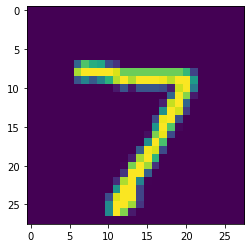

In [65]:
plt.imshow(X_test[0])

And then we can get the predictions for the entire test set by passing the predictions into the `argmax` function.

In [128]:
hard_predictions = torch.argmax(predictions_test, axis = 1)

And we can eyeball how well our first predictions match up with the labels. 

In [129]:
hard_predictions[:10]

tensor([7, 2, 1, 1, 2, 1, 2, 2, 8, 7])

In [130]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

Looking good so far.  Next, let's check the accuracy of our neural network on our testset.

In [1]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, hard_predictions.cpu())

# 0.8881

So we can see that our neural network identifies $.89$ of the data correctly.  Not too bad for our first neural network.

### Summary

In this lesson, we trained a neural network in Pytorch.  Nice work!!

### Resources

[Colab Deeep Learning](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb#scrollTo=d44TznbgZZgm)

[Log Softmax](https://stats.stackexchange.com/questions/436766/cross-entropy-with-log-softmax-activation)